In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Zapoznanie się z danymi

In [2]:
# ładujemy dane używając funkcji load iris
X, y = load_iris(return_X_y=True)

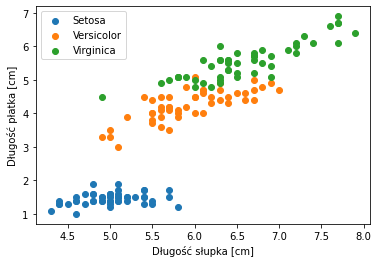

In [3]:
# tworzymy listę unikalnych klass oraz etykiet
unique_class = np.unique(y)
class_labels = ['Setosa', 'Versicolor', 'Virginica']
# tworzymy wykres
for class_, label_ in zip(unique_class, class_labels):
    plt.scatter(X[:, 0][y == class_], X[:, 2][y == class_], label=label_)
plt.xlabel('Długość słupka [cm]')
plt.ylabel('Długość płatka [cm]')
plt.legend()
plt.show()

In [4]:
# nasz Perceptron obsługuje tylko klasyfikację binarną (dwie klasy), bierzemy więc tylko 100 pierwszych próbek
X = X[:100, :]
y = y[:100]

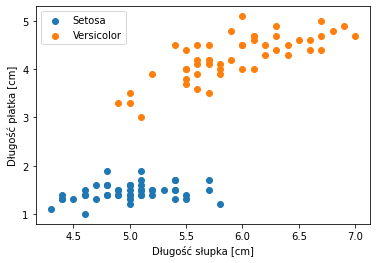

In [5]:
# tworzymy analogiczny wykres dla nich
unique_class = np.unique(y)
class_labels = ['Setosa', 'Versicolor']
for class_, label_ in zip(unique_class, class_labels):
    plt.scatter(X[:, 0][y == class_], X[:, 2][y == class_], label=label_)
plt.xlabel('Długość słupka [cm]')
plt.ylabel('Długość płatka [cm]')
plt.legend()
plt.show()

In [6]:
# dzielimy dane na zestaw treningowy oraz testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Implementacja klasy Perceptronu

In [7]:
class Perceptron:
    
    def __init__(self, eta=0.01, n_iters=10):
        # przypisujemy wartość dla parametrów
        self.eta = eta
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # inicjalizujemy losowe, niewielkie wagi oraz bias
        self.w = np.random.sample(n_features)
        self.b = np.random.sample()
        error_ = []
        for i in range(self.n_iters):
            # licznik błędnych klasyfikacji w każdej iteracji
            error_count = 0
            # dla każdego wektora cech oraz klasy
            for xi, y_true in zip(X, y):
                # przewidujemy wartość
                pred = self.predict(xi)
                # liczymy błąd 
                error = (pred - y_true)
                # aktualizujemy wagi
                self.w -= self.eta * error * xi
                self.b -= self.eta * error
                if error == 1:
                    error_count += 1
            error_.append(error_count)
        return error_
    
    def net_input(self, X):
        # obliczamy całkowite pobudzenie, korzystająć z iloczynu macierzowo-wektorowego
        return np.dot(X, self.w) + self.b
    
    def predict(self, X):
        # przewidujemy używając funkcji skoku jednostkowego
        return np.where(self.net_input(X) >= 0, 1, 0)

# Trenowanie algorytmu

In [8]:
epochs = 10
perceptron = Perceptron(eta=0.001, n_iters=epochs)
error = perceptron.fit(X_train, y_train)

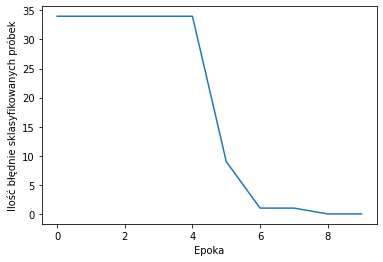

In [9]:
plt.plot(np.arange(0, epochs, 1), error)
plt.xlabel('Epoka')
plt.ylabel('Ilość błędnie sklasyfikowanych próbek')
plt.show()

In [12]:
score = accuracy_score(y_test, perceptron.predict(X_test))
print(f'dokładność: {score}')

dokładność: 1.0
